In [ ]:
# Autores: 
# Junco de las Heras Valenzuela junco.heras@estudiante.uam.es
# Marta Vaquerizo Núñez marta.vaquerizo@estudiante.uam.es
# Grupo 2301, Doble Grado.

## 3. Clasificación de caracteres manuscritos (OCR) (OPCIONAL)

En este apartado entrenaremos una red neuronal para que aprenda a clasificar automáticamente imágenes de dígitos escritos a mano. Este es un ejemplo de OCR (Optical Character Recognition) que utilizan empresas como Correos para interpretar automáticamente los datos de remitente escritos a mano en el sobre, previamente capturados con una cámara.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

%matplotlib inline

## 3.1. Carga de datos

Usaremos la base de datos **MNIST**, muy usada en Machine Learning para poner a prueba algoritmos. A continuación la cargamos:

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255. # reescalado de datos para que los datos de píxeles vayan de 0 a 1
y = y.astype(int) # las etiquetas leídas son de tipo str: las convertimos a int

In [4]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

print(y[:10])

<type 'numpy.ndarray'>
(70000, 784)
<type 'numpy.ndarray'>
(70000,)
[5 0 4 1 9 2 1 3 1 4]


In [5]:
n_clases = len(np.unique(y))
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X.min(), X.max()

(52500, 784)
(52500,)
(17500, 784)
(17500,)


(0.0, 1.0)

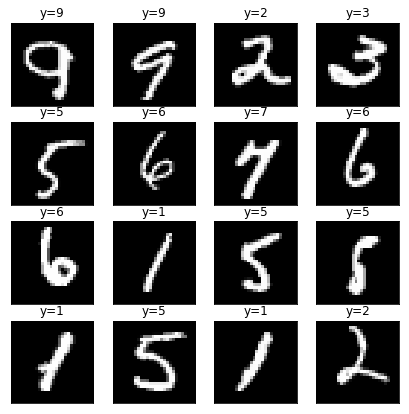

In [5]:
plt.figure(figsize=(7,7))
primero = 5000
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[primero+i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title("y={}".format(y_train[primero+i]))
    plt.xticks([])
    plt.yticks([])

## 3.2. Construcción de la Red neuronal

In [6]:
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [11]:
# Rellena esta casilla con código para crear y entrenar
# un objeto de nombre MLP y clase MLPClassifier. Usa una capa oculta y 50 neuronas. 

# clf es MLP con max_iter=1000. Tambien hemos probado cambiando max_iter 
# a 100 y a 10, para comprobar como cambiaban los scores.
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=0)
clf.fit(X_train, y_train) 


MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
# MLP Probado con max_iter=100.
clf2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=0)
clf2.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
# MLP probado con max_iter=10.
clf3 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=0)
clf3.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Calcula en la siguiente casilla los scores en training y test.

In [18]:
test = clf.score(X_test, y_test)
train = clf.score(X_train, y_train)
test2 = clf2.score(X_test, y_test)
train2 = clf2.score(X_train, y_train)
test3 = clf3.score(X_test, y_test)
train3 = clf3.score(X_train, y_train)
print(test, test2, test3, train, train2, train3)

0.9705714285714285 0.9697714285714286 0.9618285714285715 1.0 1.0 0.9776952380952381


In [ ]:
# Se han creado tres clasificadores con el mismo número de capas y de neuronas, 
# pero con distintas iteraciones. Se puede observar que para el primer
# clasificador (1000 iteraciones), el score de los datos del entrenamiento 
# es 1.0, es decir, perfecto, cosa que también ocurre en el segundo
# clasificador (100 iteraciones). En el último clasificador (10 iteraciones) no,
# incluso en los datos de entrenamiento no tiene score 1.0,
# eso se debe a que no ha entrenado lo suficiente, pero aún así 
# está bastante cerca.
# 
# Se puede comprobar que el score disminuye (se aleja del 1.0)
# a medida que disminuimos el número de iteraciones de entrenamiento. 

## 3.3 Búsqueda en rejilla.

¿Opinas que otra configuración de los hiper-parámetros puede resolver el problema mas eficientemente? Es lo mas probable. Vamos ahora a cambiar el valor de los hiper-parámetros de la red neuronal y a devolver como red definitiva la que minimize la estimación del error de generalización. Para ello hay que hacer dos cosas. La primera, cambiar el modo en el que estimamos el error de generalización. Si basamos nuestro resultado en el error proporcionado por el test, haremos overfitting en el conjunto de test. Por ello debemos cambiar esta estimación. Estimaremos el error de generalización de cada red usando Nested Cross Validation. Por otro lado, haremos una búsqueda en rejilla de los hiper-parámetros óptimos. Devolveremos el valor de los hiper-parámetros que optimize esa estimación del error de la red. Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html al problema MNIST y al espacio de hiper-parámetros de la red neuronal (cambiando el valor de la variable p_grid). Prueba a incluir en la rejilla el número de capas ocultas, el número de neuronas de las capas ocultas (haz que todas tengan el mismo número), la tasa de aprendizaje o la función de activación. Recuerda que en https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html tienes información sobre cada uno de los hiper-parámetros. Eres libre de elegir los valores y los hiper-parámetros que consideres. Antes de configurar la rejilla, lee un poco sobre cada uno de los hiper-parámetros para asegurarte de que tiene sentido tu búsqueda.

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

print(__doc__)

Automatically created module for IPython interactive environment


In [ ]:
# Number of trials
NUM_TRIALS = 1

# Set up possible values of parameters to optimize over
p_grid = {"C": [50]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Non_nested parameter search and scoring
    clf1 = GridSearchCV(estimator=svm, param_grid=p_grid, cv=5)
    clf1.fit(X, y)
    non_nested_scores[i] = clf1.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf1, X=X, y=y, cv=5)
    nested_scores[i] = nested_score.mean()
score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Nota, no hay output en esta celda debido a que consumia mucho tiempo.
# Hemos reducido el NUM_TRIALS (Numero de iteraciones) de 30 a 1 pero aun
# asi no acababa de ejecutarse en 2 horas asi que lo hemos tenido que parar. 
# También se ha variado el parámetro p_grid, pero tampoco se termina de ejecutar
# en nuestros ordenadores.
# Pero la idea era variar el p_grid con distintas capas (con el mismo número de neuronas)
# para un número razonable de trials.
